<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_5_Cross_Validation%2C_Bias_and_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

## moons

In [0]:
from sklearn.datasets import make_moons as make_datatype
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# random_state = np.random.RandomState(0)
random_state = 0

(500, 2)


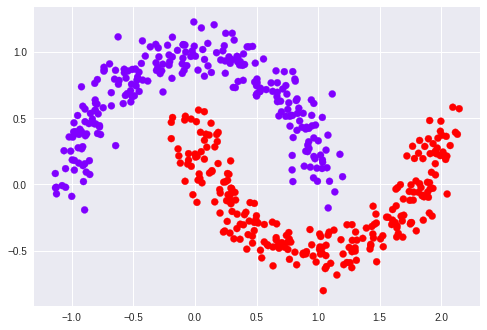

In [98]:
X, y = make_datatype(n_samples=500, noise=0.1,
                     random_state=random_state)
print(X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

In [99]:
# {y_val for y_val in y}
# {y}    Doesn't work - unhashable type
set(y)

{0, 1}

# Apply Classifier

## fit and predict

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=random_state)

In [102]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
y_test[: 5]

array([0, 0, 0, 0, 1])

In [104]:
# y_pred_proba[: 5].sum(axis=1)    # = 1
y_pred_proba[: 5, 1]

array([0.08758747, 0.03356248, 0.10559901, 0.03901789, 0.93058419])

In [0]:
y_pred_proba = y_pred_proba[:, 1]

## plot

In [0]:
import matplotlib.pyplot as plt

In [107]:
# make mesh
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 0].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx.shape, xx

((149, 195), array([[-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        ...,
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615]]))

In [108]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
Z.shape, Z

((149, 195), array([[9.92791111e-01, 9.92955210e-01, 9.93115599e-01, ...,
         9.99915444e-01, 9.99917382e-01, 9.99919276e-01],
        [9.92144644e-01, 9.92323344e-01, 9.92498010e-01, ...,
         9.99907802e-01, 9.99909916e-01, 9.99911981e-01],
        [9.91440704e-01, 9.91635283e-01, 9.91825475e-01, ...,
         9.99899470e-01, 9.99901774e-01, 9.99904026e-01],
        ...,
        [4.48797103e-04, 4.59322270e-04, 4.70094157e-04, ...,
         3.71232234e-02, 3.79611708e-02, 3.88172699e-02],
        [4.11609850e-04, 4.21263272e-04, 4.31142996e-04, ...,
         3.41510253e-02, 3.49243175e-02, 3.57144721e-02],
        [3.77502764e-04, 3.86356586e-04, 3.95417981e-04, ...,
         3.14090281e-02, 3.21222973e-02, 3.28512148e-02]]))

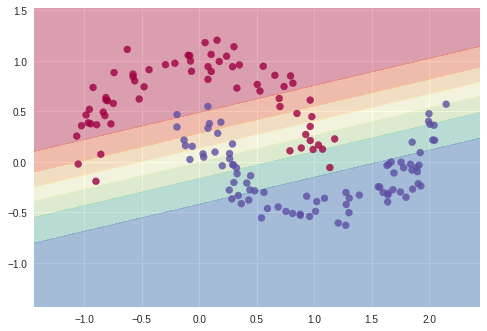

In [109]:
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.rainbow)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.4)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral, alpha=0.8)

# Plot Precision-Recall curve

In [0]:
from sklearn.metrics import precision_recall_curve

In [111]:
precision, recall, _ = precision_recall_curve(y_true=y_test, probas_pred=y_pred_proba)
precision.shape, recall.shape, precision, recall

((103,),
 (103,),
 array([0.82352941, 0.82178218, 0.82      , 0.82828283, 0.82653061,
        0.83505155, 0.83333333, 0.84210526, 0.84042553, 0.83870968,
        0.84782609, 0.85714286, 0.86666667, 0.86516854, 0.86363636,
        0.86206897, 0.87209302, 0.87058824, 0.86904762, 0.87951807,
        0.87804878, 0.87654321, 0.8875    , 0.88607595, 0.88461538,
        0.8961039 , 0.89473684, 0.89333333, 0.89189189, 0.90410959,
        0.90277778, 0.91549296, 0.91428571, 0.92753623, 0.94117647,
        0.94029851, 0.93939394, 0.95384615, 0.953125  , 0.96825397,
        0.96774194, 0.98360656, 0.98333333, 0.98305085, 0.98275862,
        0.98245614, 0.98214286, 0.98181818, 0.98148148, 0.98113208,
        0.98076923, 0.98039216, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        

Text(0, 0.5, 'Precision')

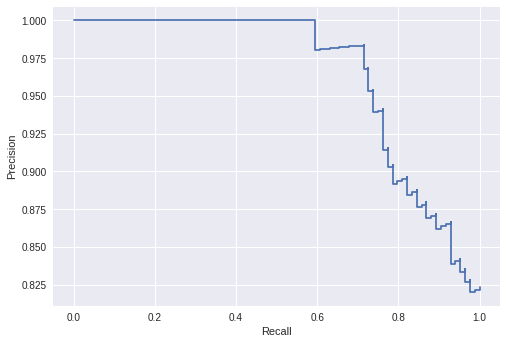

In [112]:
plt.step(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')

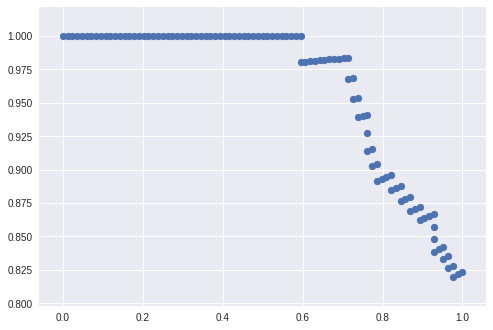

In [113]:
plt.scatter(recall, precision)

# Plot ROC curve

In [0]:
from sklearn.metrics import roc_curve, auc

In [115]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_proba)
fpr.shape, tpr.shape, thresholds.shape, fpr, tpr, thresholds

((34,),
 (34,),
 (34,),
 array([0.        , 0.        , 0.        , 0.01515152, 0.01515152,
        0.03030303, 0.03030303, 0.04545455, 0.04545455, 0.06060606,
        0.06060606, 0.09090909, 0.09090909, 0.10606061, 0.10606061,
        0.12121212, 0.12121212, 0.13636364, 0.13636364, 0.15151515,
        0.15151515, 0.16666667, 0.16666667, 0.18181818, 0.18181818,
        0.22727273, 0.22727273, 0.24242424, 0.24242424, 0.25757576,
        0.25757576, 0.27272727, 0.27272727, 1.        ]),
 array([0.        , 0.01190476, 0.5952381 , 0.5952381 , 0.71428571,
        0.71428571, 0.72619048, 0.72619048, 0.73809524, 0.73809524,
        0.76190476, 0.76190476, 0.77380952, 0.77380952, 0.78571429,
        0.78571429, 0.82142857, 0.82142857, 0.8452381 , 0.8452381 ,
        0.86904762, 0.86904762, 0.89285714, 0.89285714, 0.92857143,
        0.92857143, 0.95238095, 0.95238095, 0.96428571, 0.96428571,
        0.97619048, 0.97619048, 1.        , 1.        ]),
 array([1.98979857, 0.98979857, 0.88975687, 

In [116]:
area_under_curve = auc(fpr, tpr)
area_under_curve

0.954004329004329

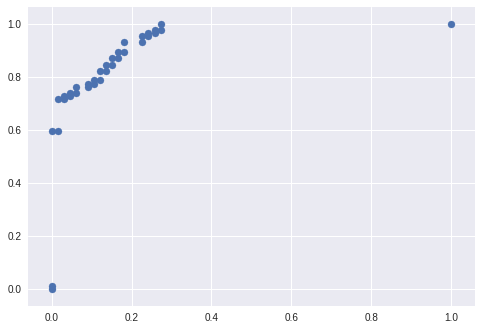

In [117]:
plt.scatter(fpr, tpr)

Text(0, 0.5, 'TPR')

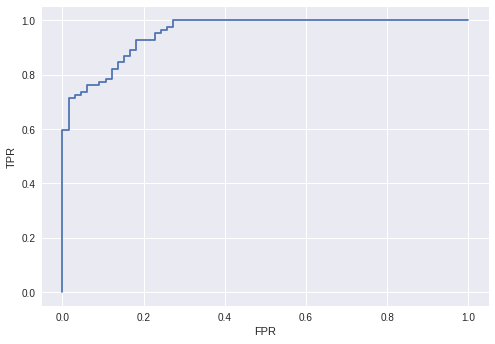

In [118]:
# plt.plot(fpr, tpr)
plt.step(fpr, tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')

# PCA

In [0]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [123]:
X, y = make_classification(n_classes=2,
                           random_state=random_state)
X.shape, y.shape, X, y

((100, 20),
 (100,),
 array([[-0.03926799,  0.13191176, -0.21120598, ...,  1.97698901,
          1.02122474, -0.46931074],
        [ 0.77416061,  0.10490717, -0.33281176, ...,  1.2678044 ,
          0.62251914, -1.49026539],
        [-0.0148577 ,  0.67057045, -0.21416666, ..., -0.10486202,
         -0.10169727, -0.45130304],
        ...,
        [ 0.29673317, -0.49610233, -0.86404499, ..., -1.10453952,
          2.01406015,  0.69042902],
        [ 0.08617684,  0.9836362 ,  0.17124355, ...,  2.11564734,
          0.11273794,  1.20985013],
        [-1.58249448, -1.42279491, -0.56430103, ...,  1.26661394,
         -1.31771734,  1.61805427]]),
 array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]))

In [124]:
pca = PCA(n_components=2)

X_new = pca.fit_transform(X)
X_new.shape, X_new[: 5]

((100, 2), array([[-0.06210507, -3.41146034],
        [-0.55062707, -2.20263008],
        [ 0.38412213, -0.00970061],
        [ 0.33390556,  0.62000907],
        [-1.65031529,  0.51948707]]))

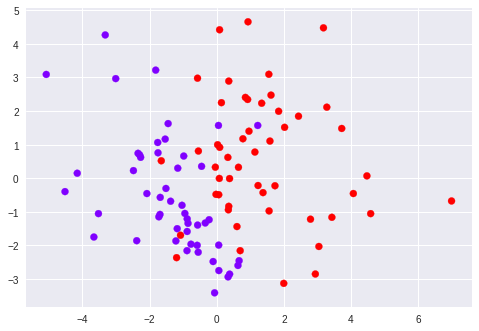

In [125]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=plt.cm.rainbow)

In [229]:
pca.components_

array([[-0.05366886, -0.09769187,  0.02502436,  0.57983039,  0.63735144,
        -0.05819881, -0.04792342,  0.01767019,  0.00125253,  0.08181737,
         0.33845721,  0.02399506, -0.009296  ,  0.0582507 , -0.04106441,
         0.0339144 ,  0.05261286,  0.32313129, -0.01164064,  0.0554565 ],
       [ 0.08471638, -0.15880379, -0.05034421,  0.33244878, -0.32332901,
         0.07673474, -0.05736229,  0.04032915, -0.05519551, -0.05786754,
         0.60532897, -0.07994312, -0.05667302, -0.01981437, -0.05881742,
        -0.04063665, -0.09794522, -0.58117761, -0.0550544 , -0.02974609]])

# K-Means

## make_blobs

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

In [0]:
CMAP = ListedColormap(['purple', 'blue', 'green', 'yellow', 'orange', 'red'])

In [301]:
X, y = make_blobs(n_samples=500, centers=6, cluster_std=1.4,
                  random_state=random_state)
X.shape

(500, 2)

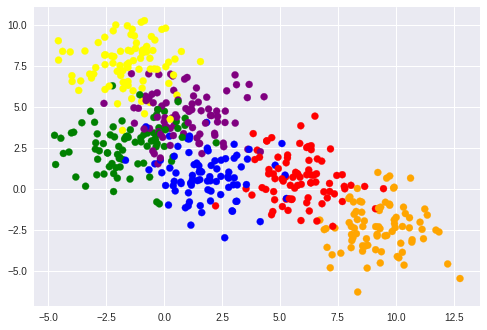

In [302]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=CMAP)

In [0]:
km_clf = KMeans(n_clusters=6)
y_pred = km_clf.fit_predict(X)

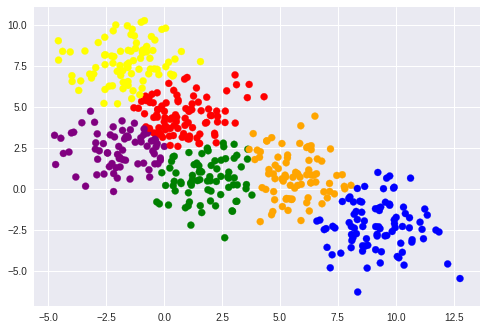

In [304]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=CMAP)

## make_classification

In [0]:
from sklearn.datasets import make_classification

In [362]:
X, y = make_classification(n_samples=100, n_classes=2, n_clusters_per_class=2,
                           n_features=2, n_redundant=0, n_informative=2,
                           random_state=random_state+8)
X.shape, y.shape, X[: 5], set(y)

((100, 2), (100,), array([[-2.45524738,  3.03837936],
        [-0.23480932, -1.81197227],
        [ 0.33385686, -0.41410363],
        [-0.14473651,  1.3512075 ],
        [ 1.5434767 , -1.52400592]]), {0, 1})

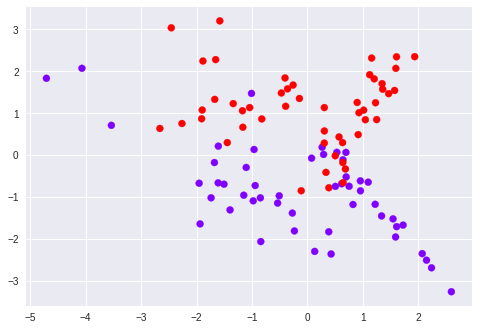

In [363]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

### Rotate the data

In [0]:
from scipy.ndimage import rotate

In [368]:
X_rot = rotate(X, angle=90)
X_rot.shape, X_rot

((2, 100),
 array([[ 3.03837936, -1.81197227, -0.41410363,  1.3512075 , -1.52400592,
         -0.33249613, -0.6160625 ,  1.46656535,  1.47196676,  1.5812912 ,
         -0.29627109,  1.48221176,  0.5756229 ,  1.16400888,  2.07035668,
          0.75312911, -0.11440453,  3.20358585,  1.07481422,  0.18689387,
          2.34958876,  1.54242081, -1.67323798, -0.52193992,  0.84403278,
          0.43240248, -0.68522081, -2.06628017, -0.85228459,  1.84083217,
         -1.31043364,  0.29761702, -3.26386112,  0.0651761 ,  1.13368217,
          0.28611257,  2.07163149, -0.7809528 ,  2.27921729,  2.31625834,
         -0.17894457,  0.13257397, -1.70933974,  1.67231087,  1.81898799,
         -0.67316894, -0.6957566 , -1.17641617, -0.97319113,  2.34565974,
          0.48810404, -0.72782043,  1.83311927,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.  

ValueError: ignored

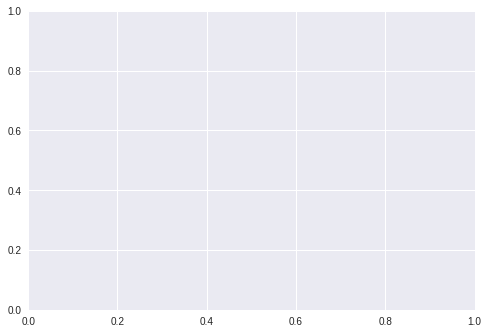

In [369]:
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=y, cmap=plt.cm.rainbow)